---
## Classification practice on glass data <br> <font size=3.4> Dataset:glass.csv<br><font size=2>Prepare a model for glass classification using KNN<br>Data Description:<br>RI : refractive index<br>Na : Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4-10)<br>Mg : Magnesium<br>AI : Aluminum<br>Si : Silicon<br>K : Potassium<br>Ca : Calcium<br> Ba : Barium<br> Fe : Iron<br>Type : Type of glass: (class attribute)<br>1 -- building_windows_float_processed<br>2 --building_windows_non_float_processed<br>3 --vehicle_windows_float_processed<br>4 --vehicle_windows_non_float_processed (none in this database)<br>5 --containers<br>6 --tableware<br>7 --headlamps
---

In [1]:
from pandas import read_csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
import warnings
from sklearn.metrics import accuracy_score
warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
df = pd.read_csv('../Ketan/Datasets/glass.csv')
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
#Checking for null values & data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [4]:
#Scaling the data (leaving out the target variable)
df1= df.iloc[:,0:9]

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

sc.fit(df1)
df_norm = sc.transform(df1)
df_norm                     #Normalised dataset

array([[ 0.87286765,  0.28495326,  1.25463857, ..., -0.14576634,
        -0.35287683, -0.5864509 ],
       [-0.24933347,  0.59181718,  0.63616803, ..., -0.79373376,
        -0.35287683, -0.5864509 ],
       [-0.72131806,  0.14993314,  0.60142249, ..., -0.82894938,
        -0.35287683, -0.5864509 ],
       ...,
       [ 0.75404635,  1.16872135, -1.86551055, ..., -0.36410319,
         2.95320036, -0.5864509 ],
       [-0.61239854,  1.19327046, -1.86551055, ..., -0.33593069,
         2.81208731, -0.5864509 ],
       [-0.41436305,  1.00915211, -1.86551055, ..., -0.23732695,
         3.01367739, -0.5864509 ]])

### Since number of columns are more, let's use PCA

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 9)
pca_values = pca.fit_transform(df_norm)
pca_values

array([[ 1.15113957, -0.52948764, -0.37209565, ..., -0.39560005,
        -0.19716008,  0.01634649],
       [-0.57413717, -0.75978777, -0.55670817, ..., -0.02415793,
        -0.28421356, -0.0107898 ],
       [-0.94015972, -0.92983597, -0.55490744, ..., -0.36751757,
        -0.09594067,  0.02164019],
       ...,
       [-1.68024627,  3.28482346, -0.93034851, ...,  0.67412231,
        -0.89170969,  0.04628358],
       [-2.36974768,  2.7568728 , -1.23470076, ...,  0.67889932,
         0.07446015, -0.02730068],
       [-2.26264885,  3.02859155, -0.89084474, ...,  0.46246107,
         0.0633149 , -0.01944978]])

In [6]:
# The amount of variance that each PCA explains is 
var = pca.explained_variance_ratio_
var

array([2.79018192e-01, 2.27785798e-01, 1.56093777e-01, 1.28651383e-01,
       1.01555805e-01, 5.86261325e-02, 4.09953826e-02, 7.09477197e-03,
       1.78757536e-04])

In [7]:
# Cumulative variance 
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 27.9 ,  50.68,  66.29,  79.16,  89.32,  95.18,  99.28,  99.99,
       100.01])

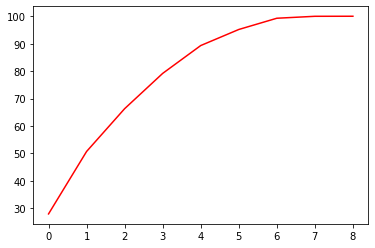

In [8]:
# Variance plot for PCA components obtained 
plt.plot(var1,color="red");

### Selecting first 7 PCAs out of total 9

In [9]:
finalDf = pd.concat([pd.DataFrame(pca_values[:,0:7],columns=['pc1','pc2','pc3','pc4','pc5','pc6','pc7']),
                     df[['Type']]], axis = 1)
finalDf

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,Type
0,1.151140,-0.529488,-0.372096,1.728901,-0.251936,0.340210,-0.395600,1
1,-0.574137,-0.759788,-0.556708,0.760232,-0.257071,-0.115960,-0.024158,1
2,-0.940160,-0.929836,-0.554907,0.206254,-0.237506,0.126630,-0.367518,1
3,-0.142083,-0.961677,-0.117125,0.415724,-0.476299,0.285805,-0.052497,1
4,-0.351092,-1.091249,-0.485079,0.069102,-0.432090,0.298032,0.158570,1
...,...,...,...,...,...,...,...,...
209,-2.383835,3.061677,0.090445,-0.376611,0.103227,0.231162,-1.320186,7
210,-2.397652,3.108236,-1.117502,0.288454,0.624723,0.618056,0.582361,7
211,-1.680246,3.284823,-0.930349,-0.171014,0.451687,1.247320,0.674122,7
212,-2.369748,2.756873,-1.234701,-0.525285,0.515008,1.003352,0.678899,7


In [10]:
array = finalDf.values
X = array[:,0:7]
Y = array[:,7]

### Selecting the model validation technique

### Trial 1 : Train Test split approach

In [11]:
from sklearn.model_selection import train_test_split
import numpy as np
test_size = 0.33
seed = 7
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
model2 = LogisticRegression()
model2.fit(X_train, Y_train)
result2 = model2.score(X_test, Y_test)
np.round(result2, 4)

0.6901

### Trial 2 : Cross Validation approach

In [12]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import numpy as np
num_folds = 10
seed = 7
kfold = KFold(n_splits=num_folds, random_state=seed)
model3 = LogisticRegression(max_iter=400)
results3 = cross_val_score(model3, X, Y, cv=kfold)
print('Result:',np.round(results3.mean(),4),'\n','\n','Standard dev:',np.round(results3.std(),4))

Result: 0.4158 
 
 Standard dev: 0.2034


### Trial 3 : Leave One Out Cross Validation approach

In [13]:
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import cross_val_score
loocv = LeaveOneOut()
model4 = LogisticRegression(max_iter=400)
results4 = cross_val_score(model4, X, Y, cv=loocv)
print('Result:',np.round(results4.mean(),4),'\n','\n','Standard dev:',np.round(results4.std(),4))

Result: 0.6308 
 
 Standard dev: 0.4826


### Hence, Train Test Split is the best model vaidation technique here, so we'll proceed with that

## KNN Classification

In [14]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

print(grid.best_score_)
print(grid.best_params_)

0.6729789590254708
{'n_neighbors': 5}


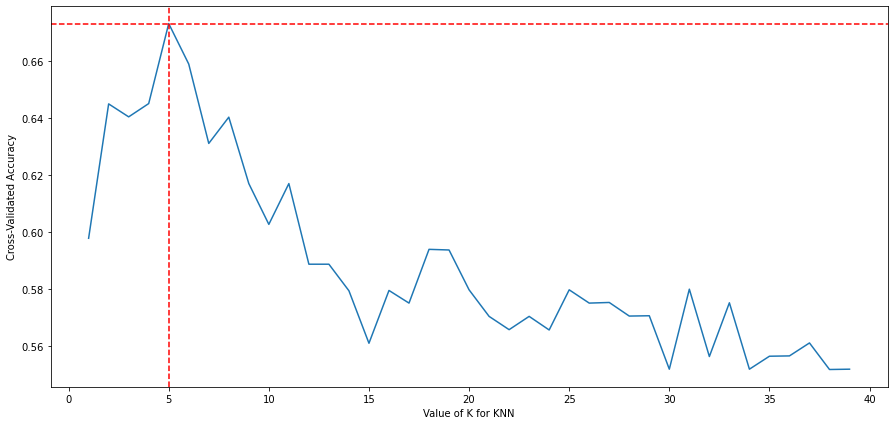

In [15]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 40
k_range = range(1, 40)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.figure(figsize=(15,7))
plt.plot(k_range, k_scores)
plt.axhline(y=0.6729789590254708, color='r', linestyle='--')
plt.axvline(x=5, color='r', linestyle='--')
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

### Hence K=5 is the best value, so we'll make the model using that.

In [16]:
#KNN Classification
model = KNeighborsClassifier(n_neighbors=5) #making the model
model.fit(X_train , Y_train) #training the model
y_pred = model.predict(X_test) #predicting on the test dataset
acc = accuracy_score(Y_test, y_pred) * 100 
print("Accuracy =", acc)

Accuracy = 66.19718309859155


## SVM Classification

In [17]:
# SVM Classification
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.preprocessing import StandardScaler

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report


from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

**Let's use Grid search CV to find out best value for params**

In [18]:
clf = SVC()
param_grid = [{'kernel':['rbf'],'gamma':[0.9,0.8,0.7,0.6,0.5,0.4,0.3,0.2,0.1],'C':[1,10,100,1000] },
             {'kernel':['linear'],'C':[1,10,100,1000]}]
gsv = GridSearchCV(clf,param_grid,cv=10,n_jobs=-1)
gsv.fit(X,Y)

gsv.best_params_ , gsv.best_score_ 

({'C': 10, 'gamma': 0.5, 'kernel': 'rbf'}, 0.6826839826839827)

In [19]:
#SVM Clasification
clf = SVC(C= 10, kernel='rbf', gamma=0.5) #building the model
clf.fit(X_train , Y_train) #training the model
y_pred = clf.predict(X_test) #predicting on test dataset
acc = accuracy_score(Y_test, y_pred) * 100
print("Accuracy =", acc)

Accuracy = 66.19718309859155


### Now, let's try some Ensemble methods to see if we can further increase the accuracy of the model

### Trial-1: Bagging

In [20]:
# Bagged Decision Trees for Classification
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

seed = 7
cart = DecisionTreeClassifier()
num_trees = 100
model = BaggingClassifier(base_estimator=cart, n_estimators=num_trees, random_state=seed)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 66.19718309859155


### Trial-2: Random Forest

In [24]:
# Random Forest Classification

from sklearn.ensemble import RandomForestClassifier

num_trees = 100
max_features = 3
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 69.01408450704226


### Trial-3: Boosting

In [28]:
# AdaBoost Classification

from sklearn.ensemble import AdaBoostClassifier
num_trees = 10
seed=7

model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 38.028169014084504


### Trial-4: Stacking

In [26]:
# Stacking Ensemble for Classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

In [29]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 70.4225352112676


In [30]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = DecisionTreeClassifier()
estimators.append(('cart', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('Boosting', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 71.83098591549296


In [31]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 71.83098591549296


In [32]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = AdaBoostClassifier(n_estimators=num_trees, random_state=seed)
estimators.append(('boosting', model))


# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 57.74647887323944


In [33]:
# create the sub models
estimators = []
model = LogisticRegression(max_iter=500)
estimators.append(('logistic', model))
model = SVC()
estimators.append(('svm', model))

# create the ensemble model
ensemble = VotingClassifier(estimators)
ensemble.fit(X_train,Y_train)
y_pred = ensemble.predict(X_test)
acc = accuracy_score(Y_test, y_pred)*100
print('Accuracy:',acc)

Accuracy: 69.01408450704226


#### Hence, we can say that a stacking model consisting of Logistic Regression, AdaBoost, and SVM is the best predicting model for this dataset